In [9]:
%pip install scikit-learn

#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
#Load dataset
data=pd.read_csv('customer_data_records.csv')

#Display the first few rows
print(data.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [11]:
#Extract relevant features for clustering
if 'data' not in locals():
	data = pd.read_csv('customer_data_records.csv')
X = data.iloc[:, [1, 2]].values  # Select columns 1 and 2 as 'annual income' and 'spending score' for all rows

In [12]:
#Feature scaling-its importanyt to scale features for scaling
scaler=StandardScaler()#create a standardscaler object
X_scaled=scaler.fit_transform(X)#standardize the features to have mean=0 and variance of 1



In [13]:
#Elbow method-to find the optimal number of clusters
wcss=[]#list to store the within-cluster sum of squares
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

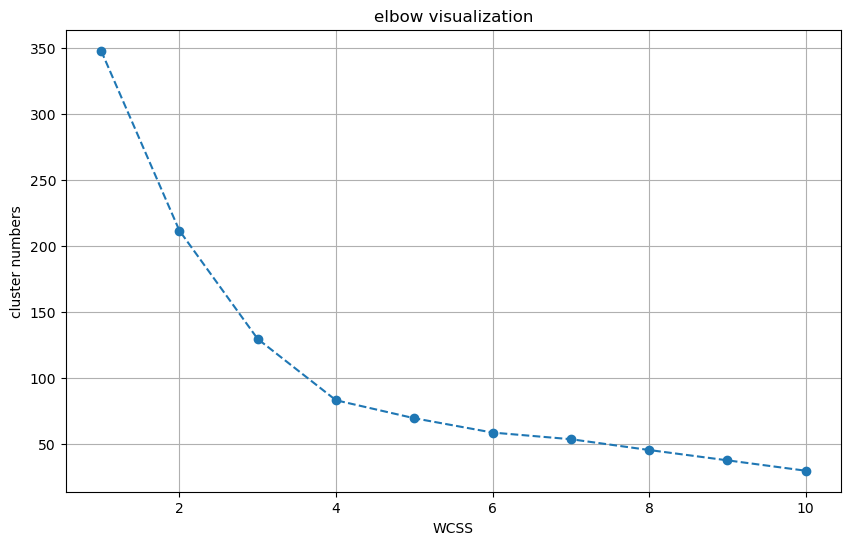

In [14]:
#plot the elbow method graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o', linestyle='--')
plt.title('elbow visualization')
plt.xlabel('WCSS')
plt.ylabel('cluster numbers')
plt.grid(True)
plt.show()

In [15]:
#Based on the elbow method, lets assume the optimal number of clusters is 5
optimal_clusters=5
#Apply kmeans clustering within the optimal clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)
# kmeans.fit(X_scaled)


In [18]:
# Predict cluster labels using the already fitted kmeans model
from sklearn.exceptions import NotFittedError

if 'X_scaled' not in locals():
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(X)

try:
	y_kmeans = kmeans.predict(X_scaled)
except NotFittedError:
	kmeans.fit(X_scaled)
	y_kmeans = kmeans.predict(X_scaled)
# Make sure cell 3 (where X_scaled is defined) is run before this cell.

In [19]:
#Add cluster labels to the original data
data['cluster']=y_kmeans

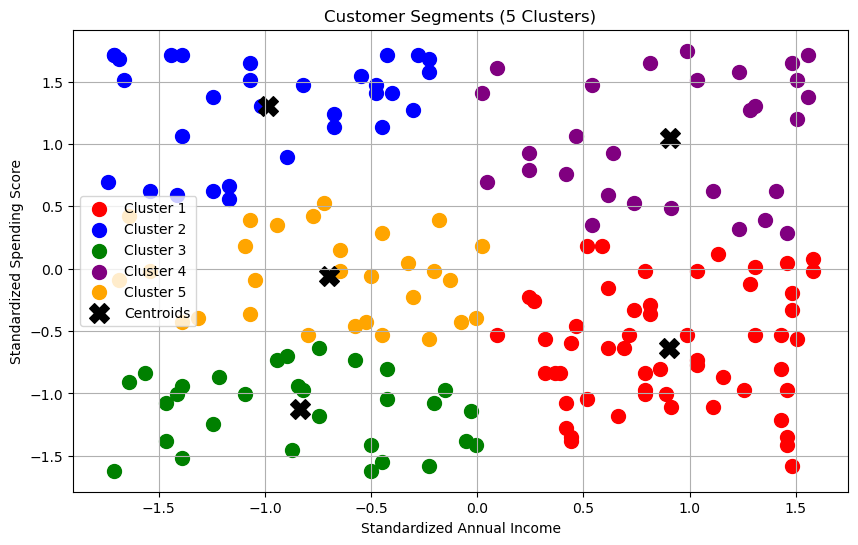

In [20]:
# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(optimal_clusters):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Segments (5 Clusters)')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend()
plt.grid(True)
plt.show()